<a href="https://colab.research.google.com/github/soroushmirzaei/text-processing-projects/blob/main/digikala-comments-text-classification/digikala-comments-text-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import requirement libraries
import os
import shutil

#import dataset query libraries
import csv
import json

#import mathematics statics libraries
import random as rnd
import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning deep learning libraries
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras


In [ ]:
#download stop-words dataset
!wget -q https://raw.githubusercontent.com/soroushmirzaei/text-processing-projects/main/english-language-stop-words.txt
!wget -q https://raw.githubusercontent.com/soroushmirzaei/text-processing-projects/main/persian-language-stop-words.txt

#download filters-characters dataset
!wget -q https://raw.githubusercontent.com/soroushmirzaei/text-processing-projects/main/english-language-filter-characters.txt
!wget -q https://raw.githubusercontent.com/soroushmirzaei/text-processing-projects/main/persian-language-filter-characters.txt

#download similar-characters dataset
!wget -q https://raw.githubusercontent.com/soroushmirzaei/text-processing-projects/main/persian-language-similar-characters.json


In [ ]:
#define filters-list function loader
def filter_chars(file_path):
    filter_chars = list()
    with open(file_path, 'r') as filters_list_file:
        for word in filters_list_file:
            filter_chars.append(word.strip('\n'))
        filters_list_file.close()
    return filter_chars

#define stop-words function loader
def stop_word(file_path):
    stop_words = list()
    with open(file_path, 'r') as stop_words_file:
        for word in stop_words_file:
            stop_words.append(word.strip('\n'))
        stop_words_file.close()
    return stop_words

#define similar-characters function loader
def similar_chars(file_path):
    with open(file_path, 'r') as similar_chars_file:
        similar_chars = json.load(similar_chars_file)
    return similar_chars


In [ ]:
#load stop-words
eng_stop_words = stop_word('english-language-stop-words.txt')
per_stop_words = stop_word('persian-language-stop-words.txt')

#load filters-characters
eng_filter_characters = filter_chars('english-language-filter-characters.txt')
per_filter_characters = filter_chars('persian-language-filter-characters.txt')

#load similar-characters
per_similar_characters = similar_chars('persian-language-similar-characters.json')


In [ ]:
#define remove filters characters function
def remove_filter(text, filters_list):
    characters = list(text)
    characters_without_filters = [character for character in characters if character not in filters_list]
    text_without_filters = ''.join(characters_without_filters)
    return text_without_filters

#define remove texts stopwords function
def remove_stopword(text, stop_words_list):
    text = text.lower()
    words_with_stopwords = text.split(' ')
    words_without_stopwords = [word for word in words_with_stopwords if word not in stop_words_list]
    text_without_stopwords = ' '.join(words_without_stopwords)
    return text_without_stopwords

#define similar characters modification function
def similar_char(text, similar_chars_dict):
    characters = list(text)
    similar_characters_modified_list = [similar_chars_dict.get(character,character) for character in characters]
    similar_characters_modified_text = ''.join(similar_characters_modified_list)
    return similar_characters_modified_text


In [ ]:
#define texts labels loader
def text_labels_loader(#define data
                       file_path, header = True, delimiter = ',',
                       text_index = None, label_index = None,
                       #define optional preprocessing
                       use_remove_stopwords = False, stop_words_list = None,
                       use_remove_filter = False, filters_chars_list = None,
                       use_simchars_modifier = False, sim_chars_dict = None
                       ):
    
    texts_list = list()
    labels_list = list()

    with open(file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter = delimiter)
        if header:
            next(csv_reader)
        for row in csv_reader:
            text, label = row[text_index], row[label_index]
            if use_remove_filter:
                text = remove_filter(text, filters_chars_list)
            if use_simchars_modifier:
                text = similar_char(text, sim_chars_dict)
            if use_remove_stopwords:
                text = remove_stopword(text, stop_words_list)
            texts_list.append(text)
            labels_list.append(label)

    return texts_list, labels_list


In [ ]:
texts_list, labels_list = text_labels_loader(#define data
                                             file_path = 'digikala.csv', header = True, delimiter = ',',
                                             text_index = 6, label_index = 7,
                                             #define optional preprocessing
                                             use_remove_filter = True, filters_chars_list = per_filter_characters,
                                             use_simchars_modifier = True, sim_chars_dict = per_similar_characters
                                             )


In [ ]:
#print out sample texts
texts_list[:5]


['من کاملا با این محصول آشنا بودم و از خریدش مطمین بودم',
 'به درد خاصی نمیخوره صرفا یکی دو روز باهاش سرگرمین بعد به عنوان یه ساعت معمولی ازش استفاده میکنین',
 'در یک کلام به نسبت هزینه ای که میکنید کالمل ترین ساعت بازار رو دریافت میکنید',
 'ساعت بسیار عالی و کاربردی هستمیخواستم برای دوستم هم بگیرم ولی به دلیل تفاوت قیمت زیاد از دیجی کالا نمیخرم',
 'دقیقا مطابق آنچه انتظار می رفت بود ']

In [ ]:
#print out sample labels
labels_list[:5]


['1', '0', '0', '0', '1']

In [ ]:
#define split training validation set
def train_valid_split(#define texts labels list
                      texts_list, labels_list,
                      #define training set size
                      train_split_size = None
                      ):

    #shuffle texts labels list
    texts_labels_zip = zip(texts_list, labels_list)
    shuffle_texts_labels_zip = rnd.sample(list(texts_labels_zip), len(texts_list))
    texts_list, labels_list = zip(*shuffle_texts_labels_zip)

    train_size = int(train_split_size * len(texts_list))
    #split train valid set
    train_texts_list = texts_list[:train_size]    
    train_labels_list = labels_list[:train_size]    

    valid_texts_list = texts_list[train_size:]    
    valid_labels_list = labels_list[train_size:]    

    return train_texts_list, train_labels_list, valid_texts_list, valid_labels_list


In [ ]:
train_texts_list, train_labels_list, valid_texts_list, valid_labels_list =  train_valid_split(#define texts labels list
                                                                                              texts_list, labels_list,
                                                                                              #define training set size
                                                                                              train_split_size = 0.9
                                                                                              )


In [ ]:
#print out sample training texts
train_texts_list[:5]


('درشگفت انگیز ارزش خرید دارد',
 'خیلی خوب',
 'از همه نظر عالییی',
 'کار راه بندازه',
 'سیم کارت در ساعت هوشمند کار نمی کند')

In [ ]:
#print out sample training labels
train_labels_list[:5]


('1', '1', '1', '1', '0')

In [ ]:
#define labels encoder
def label_encoder(#define labels list and method
                  labels_list,
                  #define method binary, ordinal or onehot
                  method, return_categories = True
                  ):
    
    #ordinal and binary encoder method
    if method in ['binary','ordinal']:
        unique_labels = sorted(list(set(labels_list)))
        labels_dict = {
            label : int(unique_labels.index(label)) for label in unique_labels
        }
        labels = list(map(lambda label : labels_dict[label], labels_list))
    
    #one-hot encoder method
    elif method in ['onehot']:
        unique_labels = sorted(list(set(labels_list)))
        labels_dict = {
            label : int(unique_labels.index(label)) for label in unique_labels
        }
        labels_encoded = list()
        for label in labels_list:
            label_encoded = len(unique_labels)*[0]
            label_number = labels_dict[label]
            label_encoded[label_number] = 1
            labels_encoded.append(label_encoded)
        labels = labels_encoded

    #convert list type to array
    labels_encoded = np.array(labels)
    
    if return_categories:
        return labels_encoded, labels_dict
    else:
        return labels_encoded
        

In [ ]:
train_labels_encoded, train_labels_dict = label_encoder(train_labels_list, 'ordinal')
valid_labels_encoded, valid_labels_dict = label_encoder(valid_labels_list, 'ordinal')


In [ ]:
#define tokenizer and sequences and padding sequences
def pad_sequences(#define training and validation set
                  train_texts, valid_texts,
                  #define vocab size and out of vocab word
                  vocab_size = None, oov_word = None,
                  #define filter characters list
                  use_modified_filters = False, filters_list = None,
                  #define sequence length, padding and truncating
                  sequence_len = None, padding_point = 'post', truncating_point = 'post',
                  #define json tokenizer
                  save_tokenizer_json = False, tokenizer_filepath = None
                  ):
    
    #define tokenizer and fit
    from keras.preprocessing.text import Tokenizer
    if use_modified_filters:
        filters = ''.join(filters_list)
    else:
        filters = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_word,
                          filters = filters)
    tokenizer.fit_on_texts(train_texts)
    word_index = tokenizer.word_index

    if save_tokenizer_json:
        with open(tokenizer_filepath+'.json','w') as tokenizer_file:
            json.dump(tokenizer.to_json(), tokenizer_file)

    #define training validation texts to sequences
    train_sequences = tokenizer.texts_to_sequences(train_texts)
    valid_sequences = tokenizer.texts_to_sequences(valid_texts)

    #define training validation pad sequences
    from keras.preprocessing.sequence import pad_sequences
    train_padded_sequences = pad_sequences(train_sequences, maxlen = sequence_len,
                                           padding = padding_point, truncating = truncating_point)
    valid_padded_sequences = pad_sequences(valid_sequences, maxlen = sequence_len,
                                           padding = padding_point, truncating = truncating_point)

    return train_padded_sequences, valid_padded_sequences, tokenizer, word_index


In [ ]:
train_padded_sequences, valid_padded_sequences, tokenizer, word_index = pad_sequences(#define training and validation set
                                                                                      train_texts_list, valid_texts_list,
                                                                                      #define vocab size and out of vocab word
                                                                                      vocab_size = None, oov_word = '<oov>',
                                                                                      #define filter characters list
                                                                                      use_modified_filters = False, filters_list = None,
                                                                                      #define sequence length, padding and truncating
                                                                                      sequence_len = 150)


In [ ]:
#load pre-trained word vectors
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.fa.300.vec.gz

#unzip the loaded file
!gunzip cc.fa.300.vec.gz


--2022-06-30 20:09:10--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.fa.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 172.67.9.4, 104.22.74.142, 104.22.75.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|172.67.9.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1258183862 (1.2G) [binary/octet-stream]
Saving to: ‘cc.fa.300.vec.gz’

cc.fa.300.vec.gz    100%[===================>]   1.17G  42.1MB/s    in 34s     

2022-06-30 20:09:44 (35.7 MB/s) - ‘cc.fa.300.vec.gz’ saved [1258183862/1258183862]



In [ ]:
#define pre-trained words dictionary loader
def word_dict_loader(#define file path and file type
                     file_path, file_type,
                     #define txt and csv file type args
                     word_index = None, vector_index = None, header = True, spliter_delimiter = None,
                     use_word_spliter = False, word_spliter = None, word_split_index = None,
                     #define json file type args
                     word_key = None, vector_key = None,
                     ):
    
    word_dict = dict()

    #define txt vec loader
    if file_type in ['txt', 'vec']:
        with open(file_path, 'r') as word_dict_file:
            if header:
                next(word_dict_file)
            for row in word_dict_file:
                row = row.split(spliter_delimiter)
                if use_word_spliter:
                    word = row[word_index].split(word_spliter)[word_split_index]
                else:
                    word = row[word_index]
                vectors = np.array(row[vector_index:], dtype = 'float32')
                word_dict[word] = vectors

    #define csv loader
    elif file_type in ['csv']:
        with open(file_path, 'r') as word_dict_file:
            word_dict_file = csv.reader(word_dict_file, delimiter = spliter_delimiter)
            if header:
                next(word_dict_file)
            for row in word_dict_file:
                if use_word_spliter:
                    word = row[word_index].split(word_spliter)[word_split_index]
                else:
                    word = row[word_index]
                vectors = np.array(row[vector_index:], dtype = 'float32')
                word_dict[word] = vectors
                
    #define json loader
    elif file_type in ['json']:
        with open(file_path, 'r') as word_dict_file:
            word_dict_file = json.load(word_dict_file)
            for item in word_dict_file:
                word = item[word_key]
                vectors = np.array(item[vector_key], dtype = 'float32')
                word_dict[word] = vectors

    #word dict params
    word_dict_size = len(word_dict)
    word_dict_dim = list(word_dict.values())[0].shape[0]

    return word_dict, word_dict_size, word_dict_dim


In [ ]:
word_dict, word_dict_size, word_dict_dim = word_dict_loader(#define file path and file type
                                                            file_path = '/content/cc.fa.300.vec', file_type = 'vec',
                                                            #define txt and csv file type args
                                                            word_index = 0, vector_index = 1, header = True, spliter_delimiter = ' ')


In [ ]:
#define pre-trained embedding word vectors
def embd_weights_loader(#define word dictionary and word index
                        word_dict, word_index, dimension
                        ):
    
    #create embedding weights
    embed_weights = np.zeros([len(word_index)+1, dimension], dtype = 'float32')

    counter = 0
    for word, index in word_index.items():
        if word in word_dict:
            embed_weights[index] = word_dict[word]
            counter += 1

    #embedding layer params
    vocab_size = embed_weights.shape[0]
    embed_dim = embed_weights.shape[1]

    return embed_weights, vocab_size, embed_dim, counter


In [ ]:
embed_weights, vocab_size, embed_dim, counter = embd_weights_loader(#define word dictionary and word index
                                                                    word_dict = word_dict, word_index = word_index,
                                                                    dimension = word_dict_dim)


In [ ]:
#define how many words the pre-trained will cover
print(f'the tokenizer word index derive {len(word_index)} words\nthe pre-traind word vectors covers {counter} words'.title())


The Tokenizer Word Index Derive 229224 Words
The Pre-Traind Word Vectors Covers 77071 Words


In [ ]:
#define model
def create_model(#define input shape
                 input_shape = None,
                 #define embedding layer parameters
                 use_pretraind_embd = False, vocab_size = None, embd_dim = None,
                 sequence_len = None, embed_weights = None,
                 #define type of layer and parameters
                 use_lstm = False, use_gru = False, use_conv = False,
                 #define lstm layers parameters
                 lstm_layers_num = None, lstm_layers_units = None,
                 #define gru layers parameters
                 gru_layers_num = None, gru_layers_units = None,
                 #define convolution layers parameters
                 conv_layers_num = None, conv_layers_filters = None, conv_layers_kernel = None,
                 #define convolution layers sub layers
                 use_max_pool = False, max_pool_size = None,
                 #define dense layer feeder
                 use_global_max_pool = False, use_global_avg_pool = False, use_flatten = False,
                 use_feeder_dropout = False, feeder_dropout_ratio = None,
                 #define dense head layers
                 use_dense_layers = True, dense_layers_num = None, dense_layers_units = None,
                 #define dense layers dropout parameters
                 use_dense_dropout = False, dense_dropout_ratio = None,
                 #define output layer parameters
                 output_layer_unit = None, output_layer_activation = None,
                 #define model compiler parameters
                 optimizer = None, loss = None, metrics = None
                 ):
    
    #define input layer
    input = keras.Input(shape = input_shape)

    #define embedding layer and parameters
    if use_pretraind_embd:
        out = keras.layers.Embedding(input_dim = vocab_size, output_dim = embd_dim, input_length = sequence_len,
                                     weights = [embed_weights], trainable = False)(input)
    else:
        out = keras.layers.Embedding(input_dim = vocab_size, output_dim = embd_dim, input_length = sequence_len)(input)

    #define type of layer and parameters
    #lstm type layers
    if use_lstm:
        sequence_return = (lstm_layers_num - 1)*[True]
        sequence_return.append(False)
        for layer_num in range(lstm_layers_num):
            out = keras.layers.Bidirectional(keras.layers.LSTM(lstm_layers_units[layer_num],
                                                               return_sequences = sequence_return[layer_num]))(out)

    #gru type layers
    elif use_gru:
        sequence_return = (gru_layers_num - 1)*[True]
        sequence_return.append(False)
        for layer_num in range(gru_layers_num):
            out = keras.layers.Bidirectional(keras.layers.GRU(gru_layers_units[layer_num],
                                                              return_sequences = sequence_return[layer_num]))(out)
    
    #convolution type layer
    elif use_conv:
        for layer_num in range(conv_layers_num):
            out = keras.layers.Conv1D(filters = conv_layers_filters[layer_num], kernel_size = conv_layers_kernel[layer_num],
                                      activation = 'relu')(out)
            if use_max_pool[layer_num]:
                out = keras.layers.MaxPool1D(max_pool_size[layer_num])(out)


    #dense layers feeder layer
    #global max pool type layer
    if use_global_max_pool:
        out = keras.layers.GlobalMaxPooling1D()(out)
        
    #global average pool type layer
    elif use_global_avg_pool:
        out = keras.layers.GlobalAveragePooling1D()(out)

    #flatten type layer
    elif use_flatten:
        out = keras.layers.Flatten()(out)

    #define feeder dropout layer
    if use_feeder_dropout:
        out = keras.layers.Dropout(feeder_dropout_ratio)(out)


    #define dense head layers
    if use_dense_layers:
        for layer_num in range(dense_layers_num):
            out = keras.layers.Dense(dense_layers_units[layer_num], activation = 'relu')(out)
            if use_dense_dropout[layer_num]:
                out = keras.layers.Dropout(dense_dropout_ratio[layer_num])(out)
    
    #define output layer
    output = keras.layers.Dense(output_layer_unit, activation = output_layer_activation)(out)

    #define model
    model = keras.models.Model(inputs = input, outputs = output)


    #compile model
    model.compile(optimizer = optimizer,
                  loss = loss,
                  metrics = metrics)
    
    return model
    

In [ ]:
#create model
model = create_model(#define input shape
                     input_shape = 150,
                     #define embedding layer parameters
                     use_pretraind_embd = True, vocab_size = vocab_size, embd_dim = embed_dim,
                     sequence_len = 150, embed_weights = embed_weights,
                     #define type of layer and parameters
                     use_lstm = False, use_gru = False, use_conv = True,
                     #define lstm layers parameters
                     lstm_layers_num = None, lstm_layers_units = None,
                     #define gru layers parameters
                     gru_layers_num = None, gru_layers_units = None,
                     #define convolution layers parameters
                     conv_layers_num = 2, conv_layers_filters = [64, 128], conv_layers_kernel = [5, 5],
                     #define convolution layers sub layers
                     use_max_pool = [False, False], max_pool_size = None,
                     #define dense layer feeder
                     use_global_max_pool = False, use_global_avg_pool = True, use_flatten = False,
                     use_feeder_dropout = True, feeder_dropout_ratio = 0.3,
                     #define dense head layers
                     use_dense_layers = True, dense_layers_num = 2, dense_layers_units = [64, 64],
                     #define dense layers dropout parameters
                     use_dense_dropout = [True, True], dense_dropout_ratio = [0.5, 0.5],
                     #define output layer parameters
                     output_layer_unit = 1, output_layer_activation = 'sigmoid',
                     #define model compiler parameters
                     optimizer = keras.optimizers.RMSprop(0.01), loss = 'binary_crossentropy', metrics = 'accuracy'
                     )

In [ ]:
#model summary
model.summary(120)


Model: "model_3"
________________________________________________________________________________________________________________________
 Layer (type)                                         Output Shape                                    Param #           
 input_4 (InputLayer)                                 [(None, 150)]                                   0                 
                                                                                                                        
 embedding_3 (Embedding)                              (None, 150, 300)                                68767500          
                                                                                                                        
 conv1d (Conv1D)                                      (None, 146, 64)                                 96064             
                                                                                                                        
 conv1d_1 (Conv

In [ ]:
#fit model
model.fit(train_padded_sequences, train_labels_encoded, epochs = 200,
          validation_data = (valid_padded_sequences, valid_labels_encoded), 
          callbacks = [keras.callbacks.EarlyStopping('val_loss', patience = 10, restore_best_weights = True),
                       keras.callbacks.ReduceLROnPlateau('val_loss', factor = 0.1, patience = 5)], steps_per_epoch = 1024)


Epoch 1/200
1024/1024 [==============================] - 180s 167ms/step - loss: 0.4976 - accuracy: 0.7658 - val_loss: 0.4046 - val_accuracy: 0.8201 - lr: 0.0100
Epoch 2/200
1024/1024 [==============================] - 170s 166ms/step - loss: 0.3933 - accuracy: 0.8294 - val_loss: 0.3659 - val_accuracy: 0.8430 - lr: 0.0100
Epoch 3/200
1024/1024 [==============================] - 170s 166ms/step - loss: 0.3627 - accuracy: 0.8440 - val_loss: 0.3391 - val_accuracy: 0.8517 - lr: 0.0100
Epoch 4/200
1024/1024 [==============================] - 151s 147ms/step - loss: 0.3460 - accuracy: 0.8512 - val_loss: 0.3326 - val_accuracy: 0.8547 - lr: 0.0100
Epoch 5/200
1024/1024 [==============================] - 151s 148ms/step - loss: 0.3356 - accuracy: 0.8557 - val_loss: 0.3286 - val_accuracy: 0.8570 - lr: 0.0100
Epoch 6/200
1024/1024 [==============================] - 169s 165ms/step - loss: 0.3279 - accuracy: 0.8587 - val_loss: 0.3304 - val_accuracy: 0.8597 - lr: 0.0100
Epoch 7/200
1024/1024 [=====

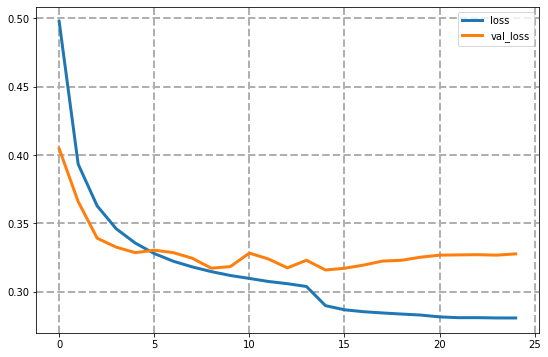

In [ ]:
#plot model training loss
pd.DataFrame(model.history.history)[['loss', 'val_loss']].plot(figsize = (9, 6), linewidth = 3)
plt.grid(linestyle = '--', linewidth = 2)
plt.show()


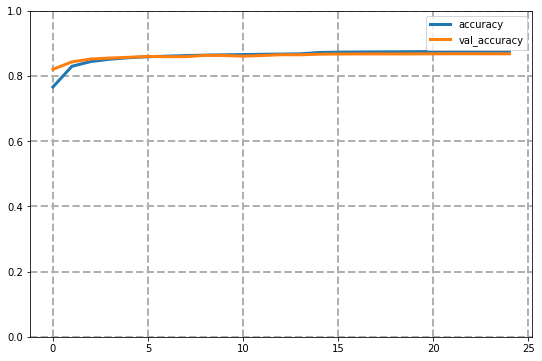

In [ ]:
#plot model training accuracy
pd.DataFrame(model.history.history)[['accuracy', 'val_accuracy']].plot(figsize = (9, 6), linewidth = 3)
plt.grid(linestyle = '--', linewidth = 2)
plt.ylim(0,1)
plt.show()


In [ ]:
#model evaluation
train_set_eval = model.evaluate(train_padded_sequences, train_labels_encoded, verbose = 0)
valid_set_eval = model.evaluate(valid_padded_sequences, valid_labels_encoded, verbose = 0)

print(f'Training Set Evaluation:\n\tLoss: {round(train_set_eval[0],4)}\tAccuracy: {100*round(train_set_eval[1],4)}%')
print(f'Training Set Evaluation:\n\tLoss: {round(valid_set_eval[0],4)}\tAccuracy: {100*round(valid_set_eval[1],4)}%')


Training Set Evaluation:
	Loss: 0.2765	Accuracy: 87.59%
Training Set Evaluation:
	Loss: 0.3159	Accuracy: 86.65%


In [ ]:
#def prediction
def predict_text(#define input text and model
                 input_text, tokenizer, model, 
                 #define tokenizer maximum length of sequence
                 maxlen_seq, padding = 'post', truncating = 'post'
                 ):
    
    #prediction
    text = str(input_text)
    sequence = tokenizer.texts_to_sequences([text])
    sequence = keras.preprocessing.sequence.pad_sequences(sequence, maxlen = maxlen_seq,
                                                          padding = padding, truncating = truncating)
    predict = model.predict(sequence)
    
    return predict


In [ ]:
#positive prediction
predict_text(#define input text and model
             input_text = 'محصول با کیفیت و خیلی خوبی هست و از خریدم راضی هستم', tokenizer = tokenizer, model = model,
             #define tokenizer maximum length of sequence
             maxlen_seq = 150, padding = 'post', truncating = 'post')


array([[0.945202]], dtype=float32)

In [ ]:
#negative prediction
predict_text(#define input text and model
             input_text = 'محصول بی کیفیتی هست و از خریدم راضی نیستم', tokenizer = tokenizer, model = model,
             #define tokenizer maximum length of sequence
             maxlen_seq = 150, padding = 'post', truncating = 'post')


array([[1.2300254e-08]], dtype=float32)

In [ ]:
#save model
model.save('/content/model.h5')
